<a href="https://colab.research.google.com/github/davidofitaly/machine-learning-notes/blob/main/unsupervised/01_clustering/03_kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

###Data generation

In [5]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std = 1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Alorithm K-means', template='plotly_dark')

###Algorithm

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [9]:
kmeans.inertia_

3874.009967156597

In [10]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,0
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [11]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='5 clusters')

###WCSS

In [13]:
wcss= []

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695978, 7734.886635126091, 4282.137026938605, 3875.340320335522, 3463.380526929782, 3104.8709105591397, 2933.0079034114206, 2496.18204694949]


In [18]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] +=1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3875.340320
4,5,3463.380527


###Elbow method

In [19]:
px.line(wcss, x='clusters', y='wcss', width=950, height=500, title='WCSS')

###Visualization of clusters

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title = '3 clusters')

In [22]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers

,c1,c2
0,-5.302413,-5.404200
1,-4.678306,6.633539
2,3.630348,1.808377


In [24]:
fig = px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title = '3 clusters')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers', marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width':2, 'color': 'tomato'}}, showlegend=False))
fig.show()

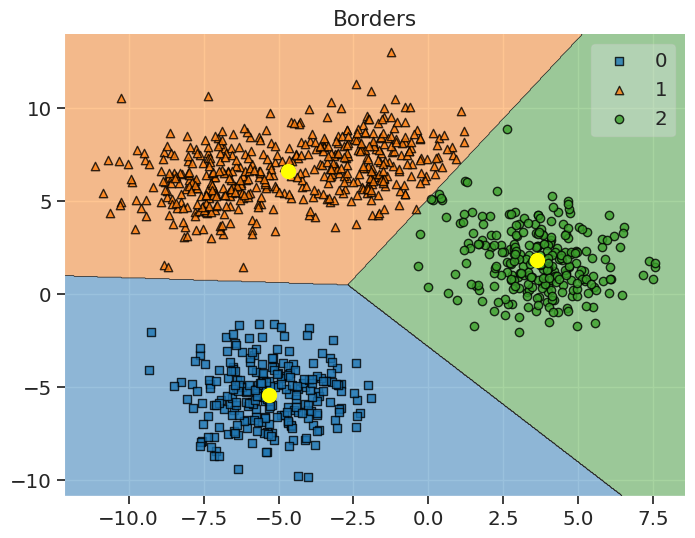

In [30]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plt.title('Borders')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()

